In [1]:
import cv2 
from PIL import ImageDraw, Image, ImageStat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
def get_image_countures(image):
    imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    img_counture = np.zeros(im.shape, dtype=np.uint8) # empty image

    cv2.drawContours(img_counture, contours, -1, (0,255,0), 3) # countur image

    return img_counture


In [3]:
def get_image_countures_area(image):
    imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    return cv2.arcLength(contours[0], True)

In [4]:
def approximate_contours(image, percent, arc_lenght):
    epsilon =  0.1 * percent * arc_lenght

    ret, thresh = cv2.threshold(image,127,255,0)
    contours, hierarchy = cv2.findContours(thresh, 1, 2)

    cnt = contours[0]
    return cv2.approxPolyDP(cnt, epsilon, True) 

In [5]:
def approach_len(image, percent):
    lenght = get_image_countures_area(image)
    return cv2.arcLength(approximate_contours(circle, percent, lenght), True)

In [6]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [7]:
def match_img(img1, img2):
    ret, thresh = cv2.threshold(img1, 127, 255,0)
    ret, thresh2 = cv2.threshold(img2, 127, 255,0)
    contours, hierarchy = cv2.findContours(thresh, 2,1)
    cnt1 = contours[0]
    contours, hierarchy = cv2.findContours(thresh2, 2,1)
    cnt2 = contours[0]
    return cv2.matchShapes(cnt1,cnt2,1,0.0)

# 5 A

circle = cv2.imread('Resources//whiteCircle.png')
plt.imshow(circle) 
print("Radius of the circle is 533, lenght is 3347")

'left original, right only countures'

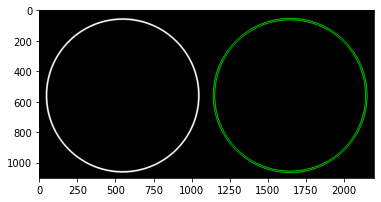

In [9]:
im = cv2.imread('Resources//whiteCircle.png')

img_counture = get_image_countures(im)

numpy_concat = np.concatenate((im, img_counture), axis=1)
plt.imshow(numpy_concat) 
"left original, right only countures"

In [10]:
print("Contour lenght: ", get_image_countures_area(im))

Contour lenght:  3346.4288296699524


# 5 B

In [11]:
circle = cv2.imread('Resources//whiteCircle.png', 0)
print('epsilon = 90% of arc length :', approach_len(circle, 0.9))
print('epsilon = 66% of arc length :', approach_len(circle, 0.66))
print('epsilon = 33% of arc length :', approach_len(circle, 0.33))
print('epsilon = 10% of arc length :', approach_len(circle, 0.1))

epsilon = 90% of arc length : 2802.7835693359375
epsilon = 66% of arc length : 2802.7835693359375
epsilon = 33% of arc length : 3034.1333923339844
epsilon = 10% of arc length : 3094.1397857666016


In [12]:
x = [approach_len(circle, i) for i in [0.9, 0.66, 0.33, 0.1]]
s = ['90%','66%','33%','10%']

<ipython-input-13-2e66fda85c1d>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(s, x,align='center', alpha=0.4, color='bgkr')


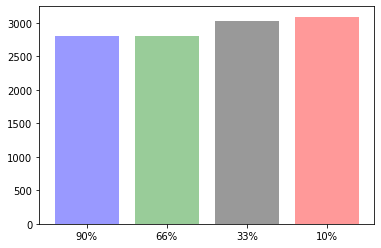

In [13]:
fig = plt.figure()
plt.bar(s, x,align='center', alpha=0.4, color='bgkr')
plt.show()

# 10

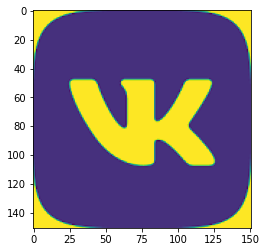

In [14]:
img = cv2.imread('Resources//index.png', 0)
plt.imshow(img)

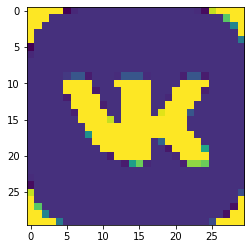

In [15]:
scaled = cv2.resize(img, (0,0), fx=0.2, fy=0.2) 
plt.imshow(scaled)

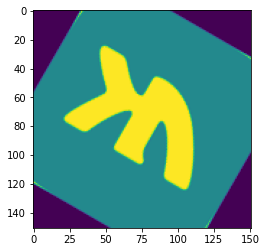

In [16]:
rotated = rotate_image(img, 150)
plt.imshow(rotated)

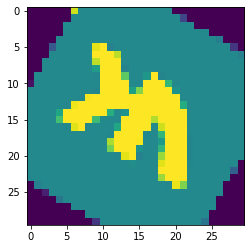

In [17]:
rotated_and_scaled = cv2.resize(rotate_image(img, 150), (0,0), fx=0.2, fy=0.2) 
plt.imshow(rotated_and_scaled)

In [18]:
values = [img, scaled, rotated, rotated_and_scaled]
names = ['origina', 'scaled', 'rotated', 'rotate+scaled']

In [19]:
# matches orig and scaled
pd.DataFrame([[np.round(match_img(i, j), 5) for i in values] for j in values],
            index=names,    
            columns=names)

,origina,scaled,rotated,rotate+scaled
origina,0.00000,2.09560,6.34755,1.80347
scaled,2.09560,0.00000,6.93625,0.42578
rotated,6.34755,6.93625,0.00000,6.66240
rotate+scaled,1.80347,0.42578,6.66240,0.00000
